In [43]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df_mixtes = pd.read_csv("../data/contexte/contexte_mixtes.csv")
df_feminins = pd.read_csv("../data/contexte/contexte_feminins.csv")
df_masculins = pd.read_csv("../data/contexte/contexte_masculins.csv")

In [45]:
df_feminins_sorted = df_feminins.sort_values(by='Titre')
df_masculins_sorted = df_masculins.sort_values(by='Titre')
df_mixtes_sorted = df_mixtes.sort_values(by='Titre')

df_feminins_grouped = df_feminins_sorted.groupby('Titre').agg({
    'Auteur': lambda x: ', '.join(x),
    'Nbr_pages': 'first'
}).reset_index()

df_masculins_grouped = df_masculins_sorted.groupby('Titre').agg({
    'Auteur': lambda x: ', '.join(x),
    'Nbr_pages': 'first'
}).reset_index()

df_mixtes_grouped = df_mixtes_sorted.groupby('Titre').agg({
    'Auteur': lambda x: ', '.join(x),
    'Nbr_pages': 'first'
}).reset_index()


In [46]:
def aggregate_titles(df):
    df['Titre'] = df['Titre'].str[:3]
    df_grouped = df.groupby('Titre').agg({
        'Auteur': lambda x: ', '.join(x),
        'Nbr_pages': 'sum'
    }).reset_index()
    return df_grouped

df_feminins_aggregated = aggregate_titles(df_feminins_grouped)
df_masculins_aggregated = aggregate_titles(df_masculins_grouped)
df_mixtes_aggregated = aggregate_titles(df_mixtes_grouped)


In [47]:
from collections import Counter

# Comparaison des noms d'auteurs et identification des noms les plus présents

# Fonction pour extraire et compter les noms d'auteurs
def count_authors(df):
    authors = df['Auteur'].str.split(', ').explode()
    author_counts = Counter(authors)
    return author_counts

# Compter les auteurs dans chaque dataframe
author_counts_feminins = count_authors(df_feminins_aggregated)
author_counts_masculins = count_authors(df_masculins_aggregated)
author_counts_mixtes = count_authors(df_mixtes_aggregated)

# Trouver les noms les plus présents
most_common_feminins = author_counts_feminins.most_common(5)
most_common_masculins = author_counts_masculins.most_common(5)
most_common_mixtes = author_counts_mixtes.most_common(5)

print("Auteurs les plus présents dans les ouvrages féminins:", most_common_feminins)
print("Auteurs les plus présents dans les ouvrages masculins:", most_common_masculins)
print("Auteurs les plus présents dans les ouvrages mixtes:", most_common_mixtes)

Auteurs les plus présents dans les ouvrages féminins: [('docteur Donn', 15), ('docteur Gyoux', 6), ('docteur Bouchut ', 4), ('docteur Bro', 3), ('docteur Bouchut', 3)]
Auteurs les plus présents dans les ouvrages masculins: [('Dr E', 10), ('docteur E', 5), ('docteur Franck', 5), ('Dr L', 4), ('madame D', 4)]
Auteurs les plus présents dans les ouvrages mixtes: [('Dr Daniel de', 2), ('Mme Millet', 1), ('Mme M illet', 1), ('M ENSEIGNEMENT SECONDAIRE', 1), ('Mme Le Roux', 1)]


/var/folders/qv/jxqksgr511n2kd5_v801s5vc0000gn/T/ipykernel_61465/1653300228.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(most_common_authors[i], rotation=45, ha='right')
/var/folders/qv/jxqksgr511n2kd5_v801s5vc0000gn/T/ipykernel_61465/1653300228.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(most_common_authors[i], rotation=45, ha='right')
/var/folders/qv/jxqksgr511n2kd5_v801s5vc0000gn/T/ipykernel_61465/1653300228.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(most_common_authors[i], rotation=45, ha='right')


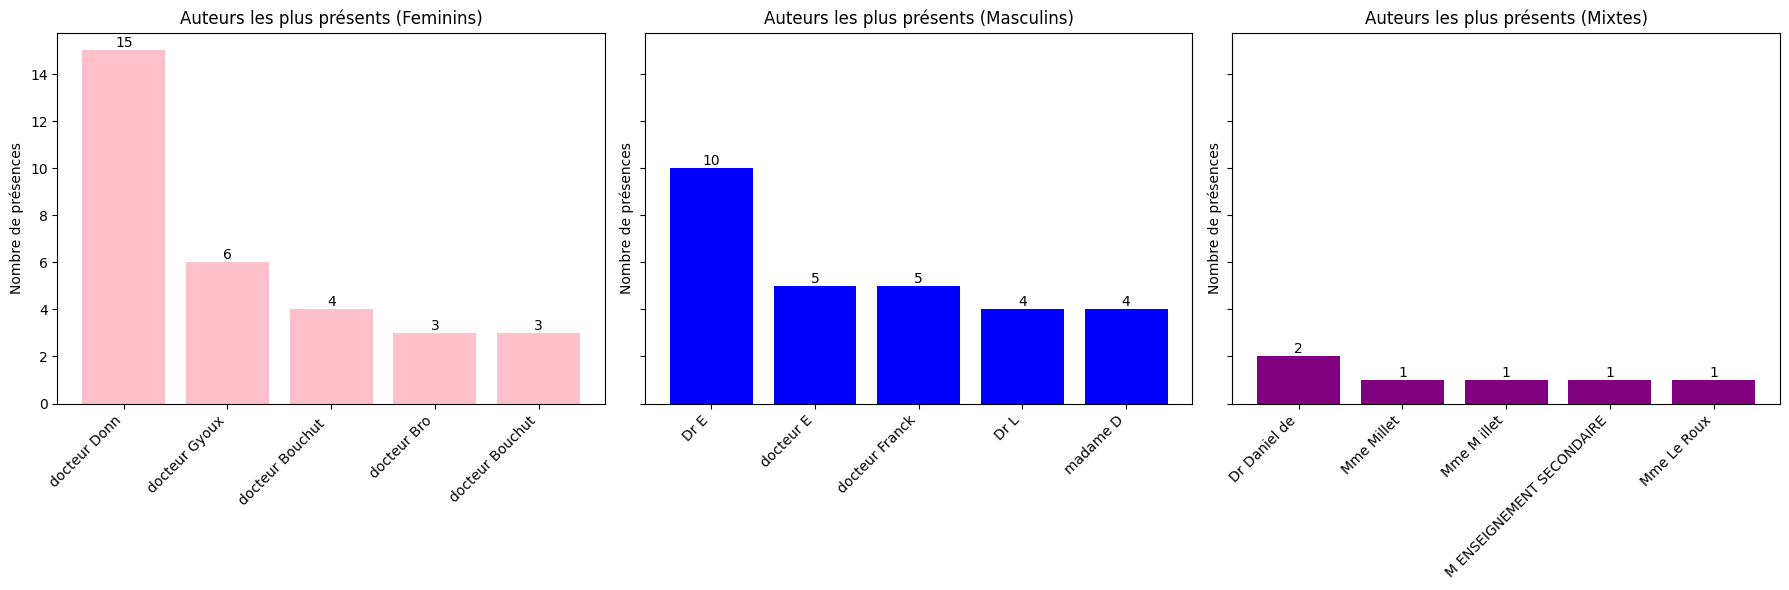

In [48]:
# Préparer les données pour le graphique
labels = ['Feminins', 'Masculins', 'Mixtes']
most_common_counts = [
    [count for _, count in most_common_feminins],
    [count for _, count in most_common_masculins],
    [count for _, count in most_common_mixtes]
]

# Les noms des auteurs les plus communs
most_common_authors = [
    [author for author, _ in most_common_feminins],
    [author for author, _ in most_common_masculins],
    [author for author, _ in most_common_mixtes]
]

# Tracer le graphique
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, ax in enumerate(axes):
    ax.bar(most_common_authors[i], most_common_counts[i], color=['pink', 'blue', 'purple'][i])
    ax.set_title(f'Auteurs les plus présents ({labels[i]})')
    ax.set_ylabel('Nombre de présences')
    ax.set_xticklabels(most_common_authors[i], rotation=45, ha='right')
    for j, count in enumerate(most_common_counts[i]):
        ax.text(j, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
df_fem = pd.read_csv("../data/contexte/years_pub_feminins.csv")
df_mas = pd.read_csv("../data/contexte/years_pub_masculins.csv")
df_mix = pd.read_csv("../data/contexte/years_pub_mixtes.csv")

df_fem["Titre"] = df_fem["Titre"].str[:2]
df_mas["Titre"] = df_mas["Titre"].str[:2]
df_mix["Titre"] = df_mix["Titre"].str[:2]

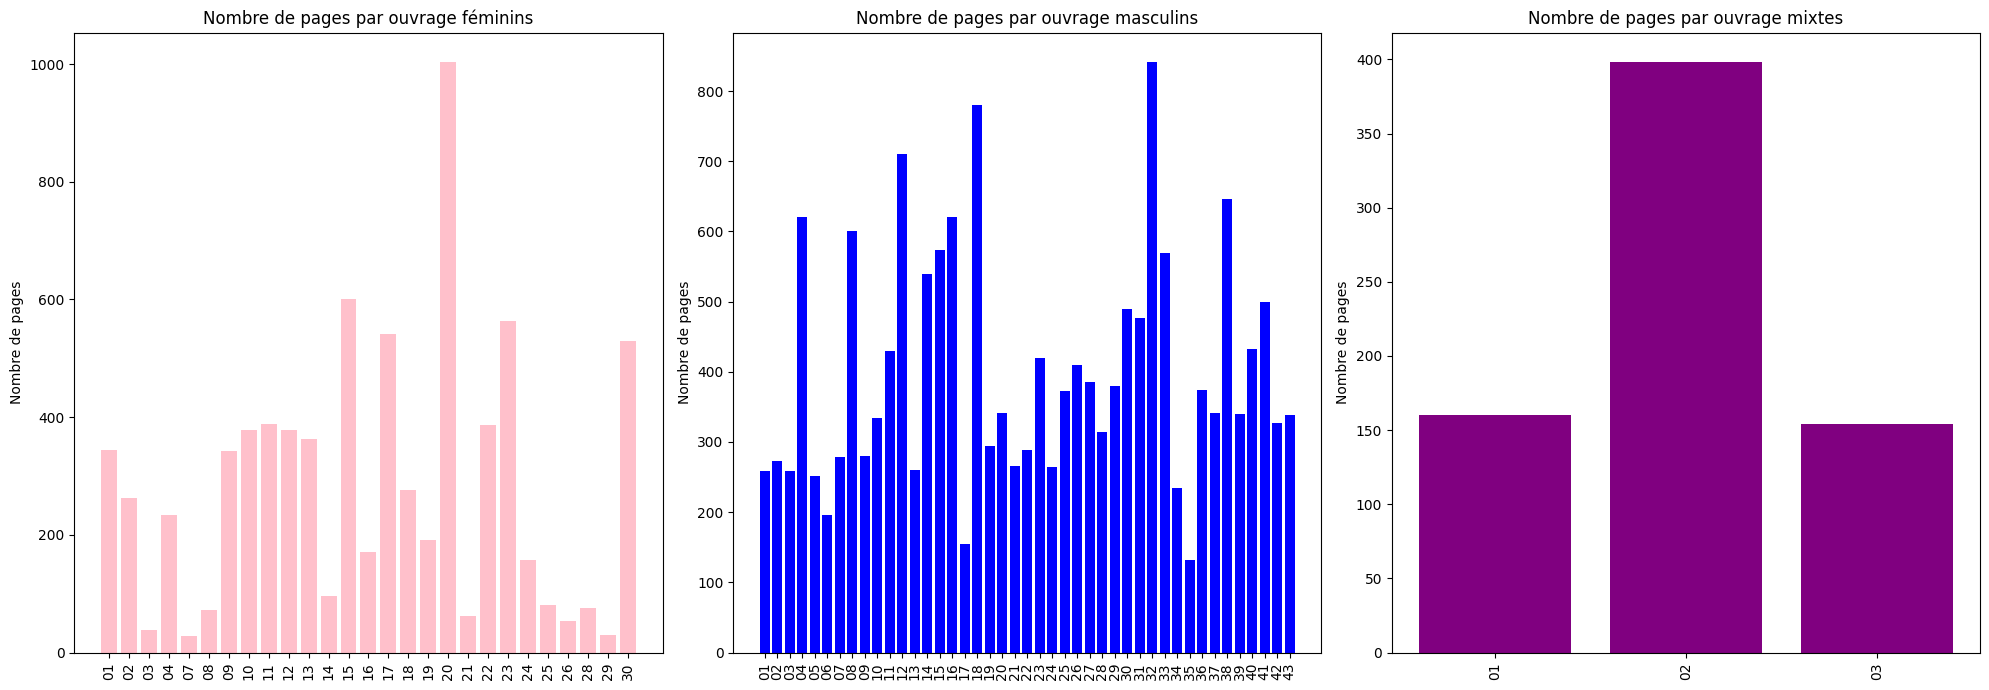

In [36]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
plt.bar(df_fem['Titre'], df_fem['Nbr_pages'], color='pink')
plt.title('Nombre de pages par ouvrage féminins')
plt.ylabel('Nombre de pages')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(df_mas['Titre'], df_mas['Nbr_pages'], color='blue')
plt.title('Nombre de pages par ouvrage masculins')
plt.ylabel('Nombre de pages')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(df_mix['Titre'], df_mix['Nbr_pages'], color='purple')
plt.title('Nombre de pages par ouvrage mixtes')
plt.ylabel('Nombre de pages')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

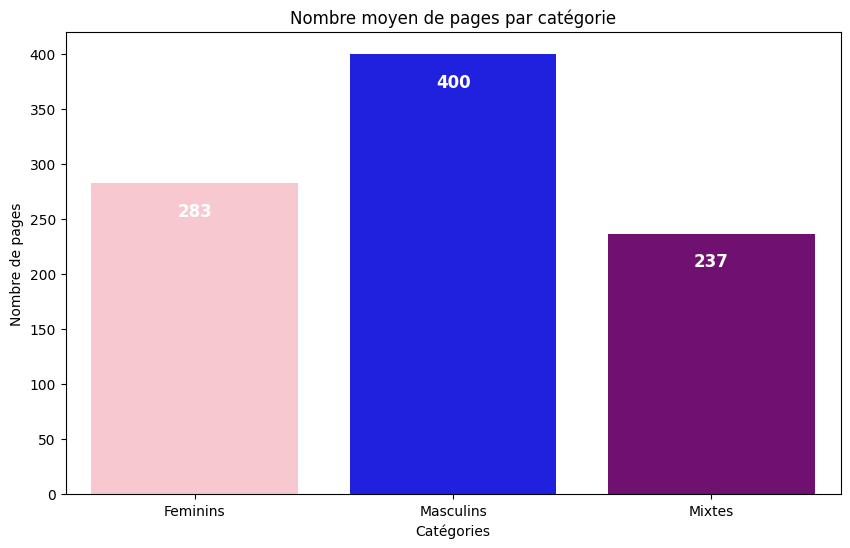

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average number of pages for each category
avg_pages_feminins = round(df_fem['Nbr_pages'].mean())
avg_pages_masculins = round(df_mas['Nbr_pages'].mean())
avg_pages_mixtes = round(df_mix['Nbr_pages'].mean())


avg_pages_df = pd.DataFrame({
    'Categories': ['Feminins', 'Masculins', 'Mixtes'],
    'Moyenne de pages': [avg_pages_feminins, avg_pages_masculins, avg_pages_mixtes]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Categories', y='Moyenne de pages', data=avg_pages_df, palette=['pink', 'blue', 'purple'], hue='Categories')
for index, row in avg_pages_df.iterrows():
    plt.text(index, row['Moyenne de pages']- 30, round(row['Moyenne de pages'], 1), color='white', ha="center", fontsize=12, fontweight='bold')
plt.title('Nombre moyen de pages par catégorie')
plt.ylabel('Nombre de pages')
plt.xlabel('Catégories')
plt.show()

In [38]:
total_pages_feminins = df_fem['Nbr_pages'].sum()
total_pages_masculins = df_mas['Nbr_pages'].sum()
total_pages_mixtes = df_mix['Nbr_pages'].sum()

total_pages = total_pages_feminins + total_pages_masculins + total_pages_mixtes

print(f"Total des pages féminins: {total_pages_feminins}")
print(f"Total des pages masculins: {total_pages_masculins}")
print(f"Total des pages mixtes: {total_pages_mixtes}")
print(f"Total des pages: {total_pages}")

Total des pages féminins: 7648
Total des pages masculins: 17195
Total des pages mixtes: 712
Total des pages: 25555


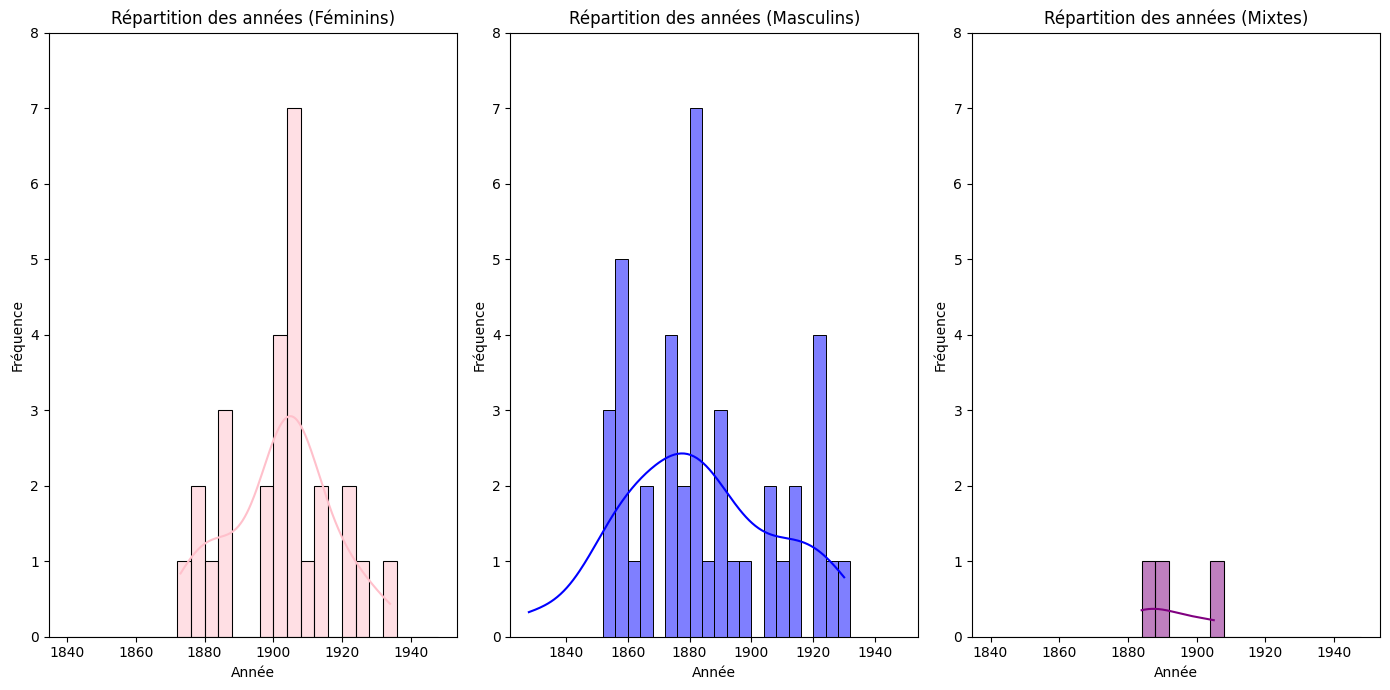

In [51]:
# Plot the distribution of years
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
sns.histplot(df_fem['Année'], bins=range(1840, 1951, 4), kde=True, color='pink')
plt.ylim(0, 8)
plt.title('Répartition des années (Féminins)')
plt.xlabel('Année')
plt.ylabel('Fréquence')

plt.subplot(1, 3, 2)
sns.histplot(df_mas['Année'], bins=range(1840, 1951, 4), kde=True, color='blue')
plt.ylim(0, 8)
plt.title('Répartition des années (Masculins)')
plt.xlabel('Année')
plt.ylabel('Fréquence')

plt.subplot(1, 3, 3)
sns.histplot(df_mix['Année'], bins=range(1840, 1951, 4), kde=True, color='purple')
plt.ylim(0, 8)
plt.title('Répartition des années (Mixtes)')
plt.xlabel('Année')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

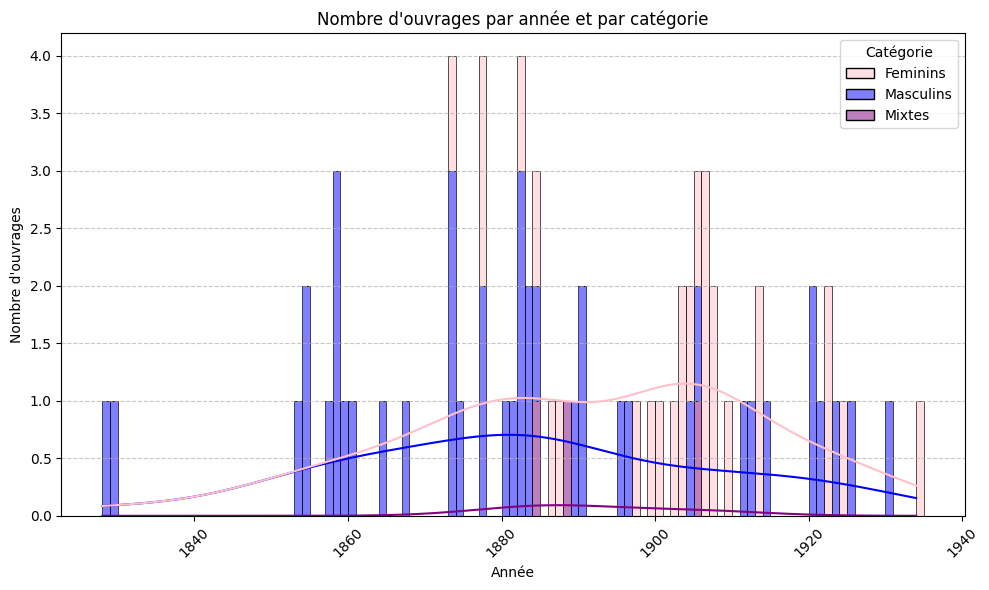

In [54]:
df_years_femminins = df_fem.copy()
df_years_mascullins = df_mas.copy()
df_years_mixtes = df_mix.copy()

df_years_femminins['Catégorie'] = 'Feminins'
df_years_mascullins['Catégorie'] = 'Masculins'
df_years_mixtes['Catégorie'] = 'Mixtes'

df = pd.concat([df_years_femminins, df_years_mascullins, df_years_mixtes])

plt.figure(figsize=(10, 6))
sns.histplot(data=df.reset_index(), x='Année', bins=range(min(df['Année']), max(df['Année']) + 2), hue='Catégorie', multiple='stack', palette=['pink', 'blue', 'purple'], kde=True)
plt.title('Nombre d\'ouvrages par année et par catégorie')
plt.xlabel('Année')
plt.ylabel('Nombre d\'ouvrages')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()